In [223]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Primer Dataset: datos medidos desde San Diego hasta el norte de Baja California, Mexico

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("drive/MyDrive/Colab Notebooks/datos_sensores/water_quality_2020_2021_datasd.csv")
print(df1['parameter'].unique())

['ENTERO' 'TOTAL' 'FECAL' 'TEMP' 'DO' 'PH' 'CHLOROPHYLL' 'XMS' 'SALINITY'
 'DENSITY']


In [225]:
df1 = df1.drop(["sample","station","project","qualifier","units"],axis=1)
df1 = df1[df1['parameter'].isin(['TEMP','PH','CHLOROPHYLL','SALINITY'])]
df1['time'] = df1['time'].fillna(0)
print(df1.time.dtype)
df1.head(20)

object


,depth_m,date_sample,time,parameter,value
8,1.0,2020-01-02,7:44:00 PST,TEMP,15.010
10,1.0,2020-01-02,7:44:00 PST,PH,8.100
11,1.0,2020-01-02,7:44:00 PST,CHLOROPHYLL,1.700
13,1.0,2020-01-02,7:44:00 PST,SALINITY,33.283
18,12.0,2020-01-02,7:44:00 PST,SALINITY,33.409
21,12.0,2020-01-02,7:44:00 PST,CHLOROPHYLL,1.620
22,12.0,2020-01-02,7:44:00 PST,TEMP,15.390
24,12.0,2020-01-02,7:44:00 PST,PH,8.110
31,18.0,2020-01-02,7:44:00 PST,TEMP,15.180
32,18.0,2020-01-02,7:44:00 PST,CHLOROPHYLL,1.180


#### El tiempo y las fechas fueron un problema para el preprocesamiento, ya que al eliminar los duplicados luego de tomar los datos de interes, el tamaño se reducia y no calzaba con el numero de datos extraidos. Por ello, se decide trabajar unicamente con los datos y ver sus correlaciones

In [226]:
temp = []
ph = []
cloro = []
sali = []
for i, col in enumerate(df1["parameter"]):
  if col == "TEMP":
    temp.append(df1["value"].iloc[i])
  if col == "PH":
    ph.append(df1["value"].iloc[i])
  if col == "CHLOROPHYLL":
    cloro.append(df1["value"].iloc[i])
  if col == "SALINITY":
    sali.append(df1["value"].iloc[i])

# Imprime el DataFrame
print(len(temp))
print(len(ph))
print(len(cloro))
print(len(sali))

6645
6645
6645
6645


In [227]:
df1_final = pd.DataFrame({
    "TEMP": temp,
    "PH": ph,
    "CHLOROPHYLL": cloro,
    "SALINITY": sali
})

df1_final.head(10)

,TEMP,PH,CHLOROPHYLL,SALINITY
0,15.01,8.10,1.70,33.283
1,15.39,8.11,1.62,33.409
2,15.18,8.10,1.18,33.408
3,15.19,8.14,0.76,33.399
4,15.20,8.14,0.84,33.404
5,15.21,8.13,0.83,33.407
6,15.24,8.12,1.02,33.382
7,15.31,8.12,1.06,33.400
8,15.28,8.11,0.76,33.424
9,14.81,8.17,1.42,33.262


In [228]:
def plot_corr_matrix(data,features=None,annot=True,s=(8,8)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 20)
    plt.show()

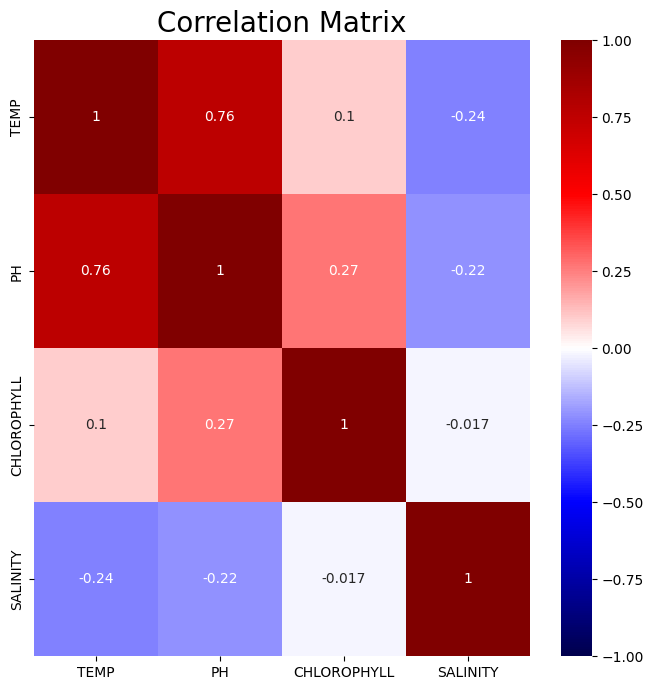

In [229]:
plot_corr_matrix(df1_final)

## Segundo Dataset: datos del Lago Salton de California (lago salado), en el cual tambien crecen peces de agua salada

In [230]:
df2 = pd.read_csv("drive/MyDrive/Colab Notebooks/datos_sensores/Quarterly_Water_Quality_Surveys_-_Salton_Sea_[ds429].csv")
df2 = df2.drop(["X","Y","OBJECTID","PROBE","COMMENTS","UTM_E","UTM_N"],axis=1)
df2['DATE_'] = df2['DATE_'].astype("datetime64[D]")
df2 = df2.drop(index=135)
df2['DISS_OXYGE'] = pd.to_numeric(df2['DISS_OXYGE'])
df2.head(18)

,DATE_,SITE,TEMP_C,CONDUCTIVI,SP_CONDUCT,SALINITY,DISS_OXYGE
0,2008-07-07,North Desert Shores,32.7,64.70,56.9,37.8,5.3
1,2008-07-08,North Desert Shores,31.7,66.50,59.0,39.4,2.0
2,2008-07-08,Whitewater River,33.6,70.69,60.6,40.3,2.2
3,2008-07-09,North Shore,32.3,67.50,59.3,39.5,3.9
4,2008-07-09,Whitewater River,32.5,69.10,60.4,40.3,2.0
5,2008-07-10,North Shore,32.8,71.60,62.2,41.6,5.3
6,2008-07-15,Bat Caves,32.0,65.00,57.5,38.1,5.5
7,2008-07-16,Bat Caves,32.2,69.10,60.5,40.4,4.7
8,2008-07-16,The Cliffs,31.8,67.60,60.0,39.9,2.4
9,2008-07-17,Alamo River,30.5,64.50,58.5,38.9,3.6


<ipython-input-228-543adc3b3308>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


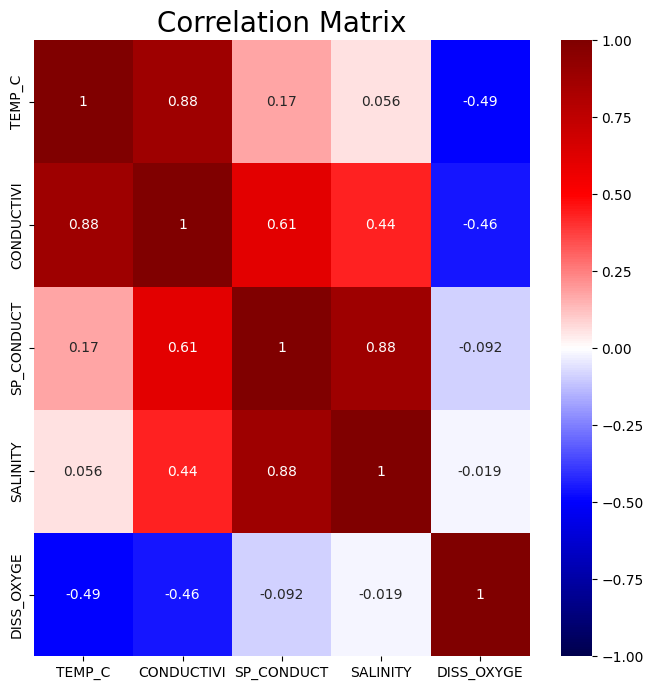

In [231]:
plot_corr_matrix(df2)

## Tercer Dataset: datos extraidos de la salmonera en Puerto Montt mediante Google Earth Engine

In [232]:
df_turb = pd.read_csv("drive/MyDrive/Colab Notebooks/datos_sensores/turb_salmonera.csv").dropna()
df_cloro = pd.read_csv("drive/MyDrive/Colab Notebooks/datos_sensores/cloro_salmonera.csv").dropna()
df_temp_gen = pd.read_csv("drive/MyDrive/Colab Notebooks/datos_sensores/temp_salmonera.csv").dropna()
df_lst_d = pd.read_csv("drive/MyDrive/Colab Notebooks/datos_sensores/lst_salmonera_dia.csv")
df_lst_n = pd.read_csv("drive/MyDrive/Colab Notebooks/datos_sensores/lst_salmonera_noche.csv")

df_list = [df_turb, df_cloro, df_temp_gen, df_lst_d, df_lst_n]

for df in df_list:
  df['system:time_start'] = pd.to_datetime(df['system:time_start'])

mean_turb = df_turb.groupby([pd.Grouper(key='system:time_start', freq='D')])['Oa02_radiance'].mean().reset_index(name='mean_turb')
mean_cloro = df_cloro.groupby([pd.Grouper(key='system:time_start', freq='D')])['Oa06_radiance'].mean().reset_index(name='mean_chloro')
mean_temp = df_temp_gen.groupby([pd.Grouper(key='system:time_start', freq='D')])['sea_surface_temperature'].mean().reset_index(name='mean_temp')

df3 = pd.DataFrame({
    "Date": mean_turb['system:time_start'],
    "mean_turb": mean_turb['mean_turb'],
    "mean_chloro": mean_cloro['mean_chloro'],
    "mean_temp": mean_temp['mean_temp']
})

df3.head(10)




,Date,mean_turb,mean_chloro,mean_temp
0,2021-01-01,1.178,0.9020,16.120
1,2021-01-02,1.325,0.8280,12.360
2,2021-01-03,2.436,2.6170,15.800
3,2021-01-04,1.108,0.7300,11.600
4,2021-01-05,2.832,3.2830,4.415
5,2021-01-06,1.392,0.9020,10.665
6,2021-01-07,0.937,0.5680,5.930
7,2021-01-08,2.006,1.8735,-3.000
8,2021-01-09,3.298,3.7010,-3.000
9,2021-01-10,2.748,2.8120,11.510


### Se hace un calculo del promedio tanto de la turbiedad, temperatura, y clorofila por dia, al tratarse de mediciones realizadas en varios momentos del dia de forma dispar (algunos dias tenian 3 mediciones, otros 5)

<ipython-input-228-543adc3b3308>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


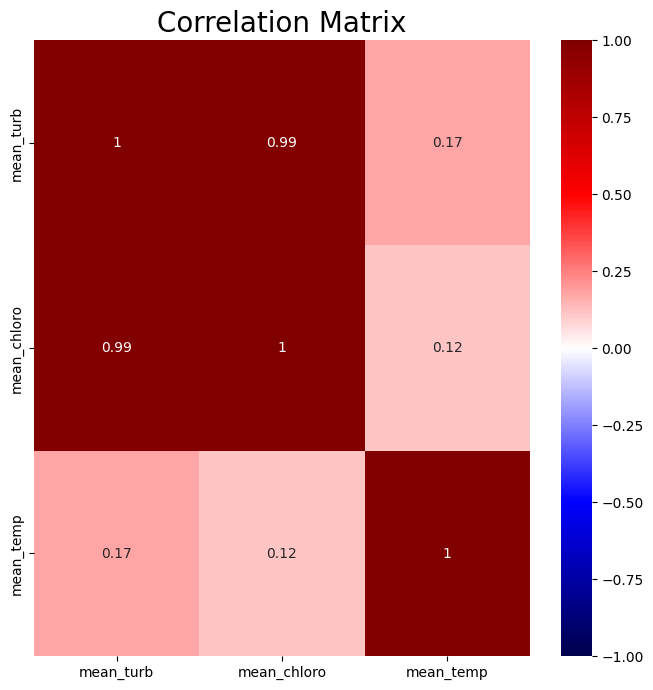

In [233]:
plot_corr_matrix(df3)

### Las correlaciones entre turbiedad y clorofila son engañosas en este caso, ya que ambos datos vienen del mismo satelite

### Queda a futuro decidir como realizar los algoritmos predictivos teniendo estos 3 datasets, si estandarizarlos como pares en donde los datos que falten se dejen en 0, y luego probar una bateria de algoritmos predicitos de scikit-learn (mas practico), o desarrollar una red neuronal que use transfer learning (mas preciso)